## Data Dictionary 

In [111]:
# Please import banking.csv

Exercise: The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

Input variables

1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=‘no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)Predict variable (desired target)
y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# Import relevant modules and file:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



file1 = '/Users/dbuettner/nf-ds/Logistic/Logistic_Regression_without_solutions/banking.csv'
df1 = pd.read_csv(file1)
df1_copy = df1.copy()

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
#df1.drop('Obs No.', axis=1, inplace=True)

In [14]:
df1.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [13]:
(df1.job == 'unknown').sum()

330

In [33]:
#[(df1.ds1 == 'unknown').sum() for ds1 in df1.columns]

In [25]:
#[(df1[ds1] == 'unknown').sum() for ds1 in df1.columns]

In [32]:
[(ds1, (df1[ds1] == 'unknown').sum()) for ds1 in df1.columns if df1[ds1].dtype == 'O']

[('job', 330),
 ('marital', 80),
 ('education', 1731),
 ('default', 8597),
 ('housing', 990),
 ('loan', 990),
 ('contact', 0),
 ('month', 0),
 ('day_of_week', 0),
 ('poutcome', 0)]

In [35]:
[(ds1, df1[ds1].nunique()) for ds1 in df1.columns if df1[ds1].dtype == 'O']

[('job', 12),
 ('marital', 4),
 ('education', 8),
 ('default', 3),
 ('housing', 3),
 ('loan', 3),
 ('contact', 2),
 ('month', 10),
 ('day_of_week', 5),
 ('poutcome', 3)]

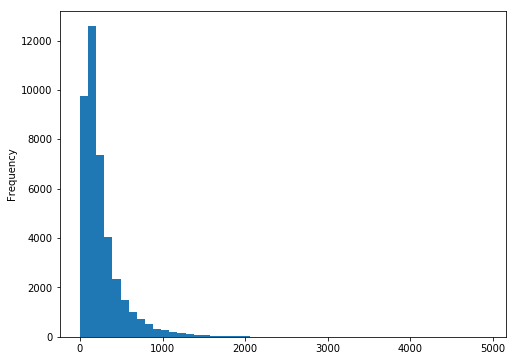

In [41]:
plt.figure(figsize=(8,6))
df1.duration.plot(kind='hist', bins=50)
plt.show()

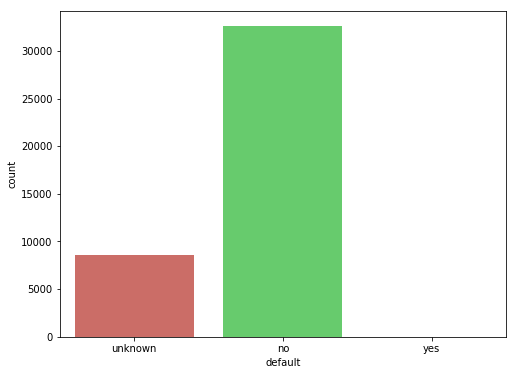

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(x='default',data=df1, palette='hls')
plt.show()

In [48]:
(df1.default == 'yes').sum()

3

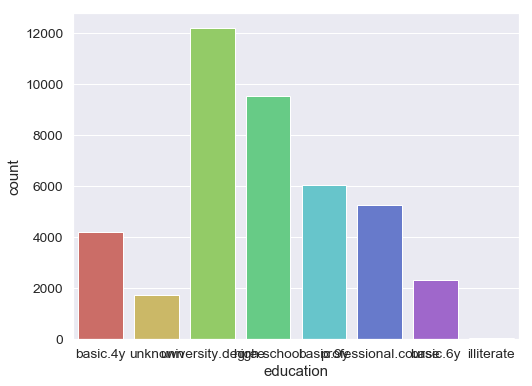

In [112]:
plt.figure(figsize=(8,6))
sns.countplot(x='education',data=df1, palette='hls')
plt.show()

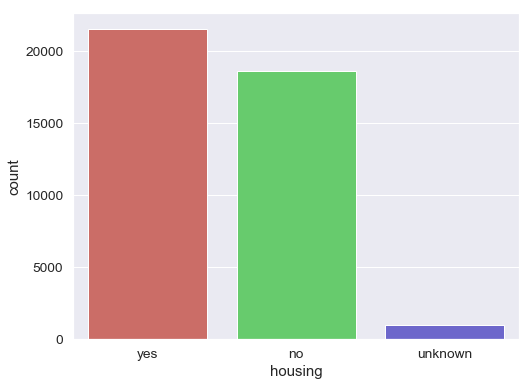

In [113]:
plt.figure(figsize=(8,6))
sns.countplot(x='housing',data=df1, palette='hls')
plt.show()

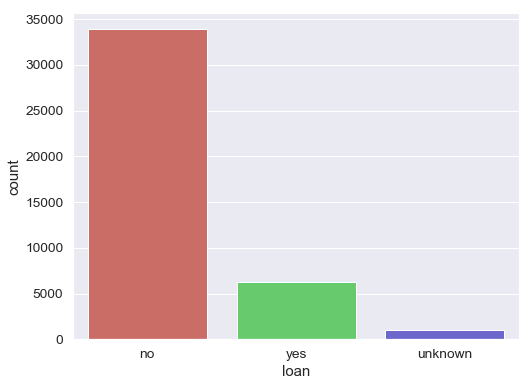

In [114]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan',data=df1, palette='hls')
plt.show()

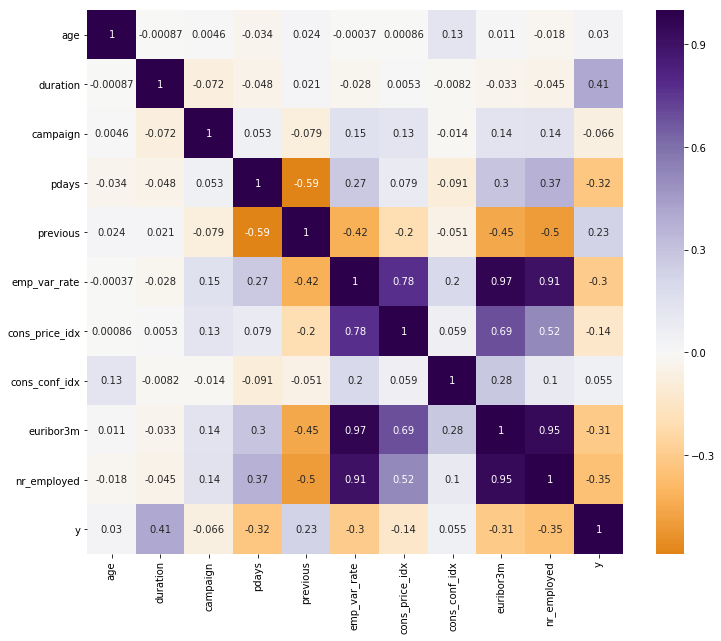

In [59]:
corr_mat = df1.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, cmap='PuOr', center=0.0, annot=True, annot_kws={'size': 10})
plt.show()

In [61]:
corr_mat.loc['y', :].sort_values(ascending=False)

y                 1.000000
duration          0.405274
previous          0.230181
cons_conf_idx     0.054878
age               0.030399
campaign         -0.066357
cons_price_idx   -0.136211
emp_var_rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: y, dtype: float64

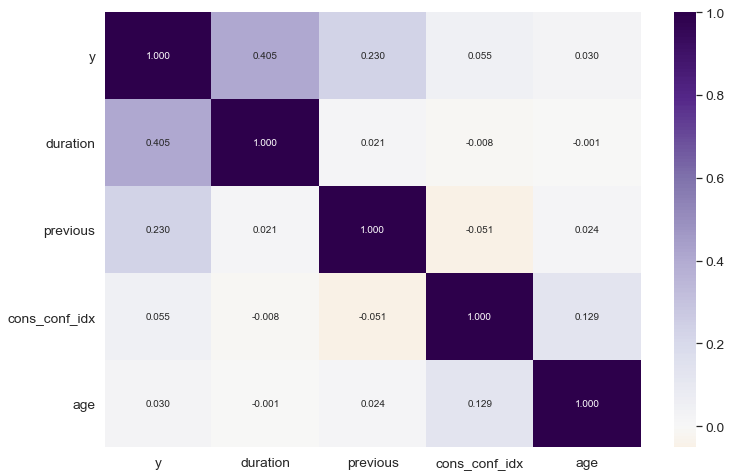

In [62]:
k = 5 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(12,8))
hm = sns.heatmap(cm,annot=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='PuOr', center=0.0)
plt.show()

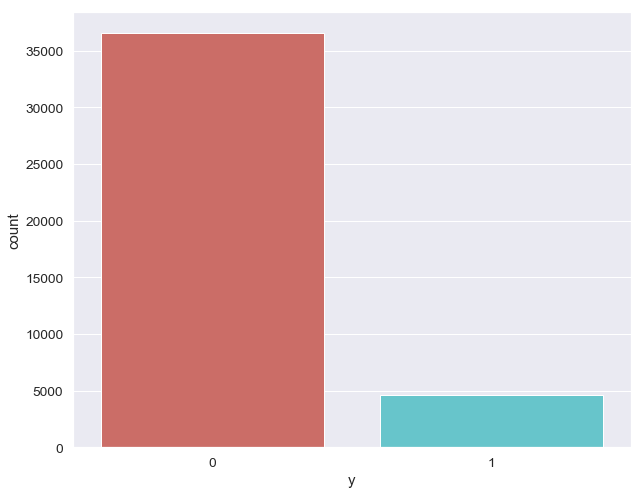

In [63]:
plt.figure(figsize=(10,8))
sns.countplot(x='y',data=df1, palette='hls')

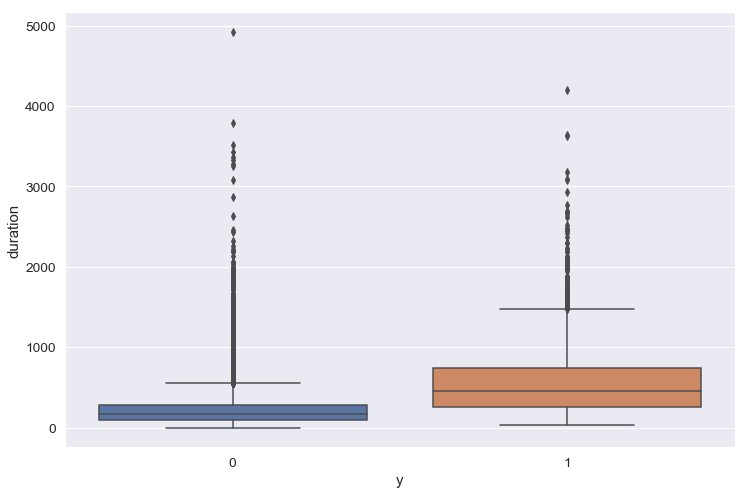

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1, x='y', y='duration')
#plt.ylim(0,100000)
plt.show()

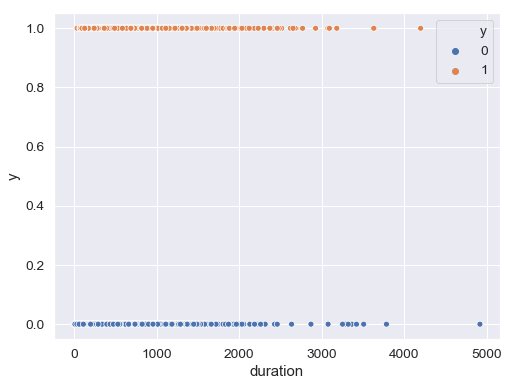

In [66]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='duration', y='y', hue='y', data=df1)
plt.show()


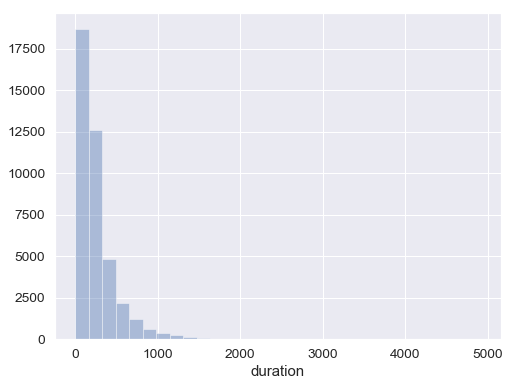

In [67]:
plt.figure(figsize=(8,6))
sns.distplot(df1['duration'], bins=30, kde=False)

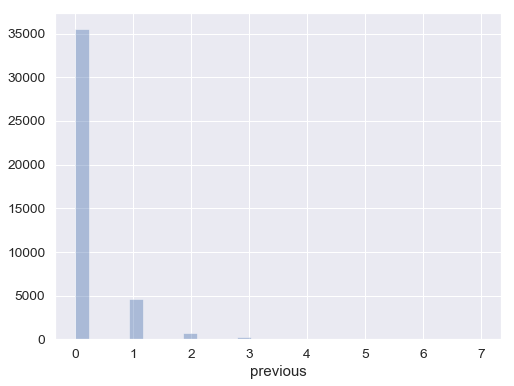

In [68]:
plt.figure(figsize=(8,6))
sns.distplot(df1['previous'], bins=30, kde=False)

In [69]:
cols = df1.columns[:]
cols

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [116]:
#cols = df1.columns[1:]
cols = ['duration', 'previous', 'pdays', 'emp_var_rate', 'euribor3m', 'nr_employed']
X = df1.loc[:, cols].values
y = df1.loc[:, 'y'].values

In [117]:
#df1.loc[:, cols]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [119]:
#LogReg = LogisticRegression(solver='lbfgs')   # otherwise solver set to 'lbfgs' (in the future)
LogReg = LogisticRegression()          # for one vs rest, standard 'liblinear
LogReg.fit(X_train, y_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
y_pred = LogReg.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[7135,  190],
       [ 568,  345]])

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7325
           1       0.64      0.38      0.48       913

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.71      8238
weighted avg       0.90      0.91      0.90      8238



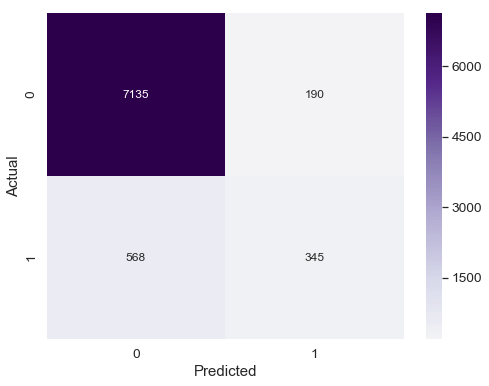

In [123]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
#sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 10}, fmt='% 4.2f')
sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 12}, fmt='d', cmap='PuOr', center=0.0)
plt.show()

#print('Accuracy:  ',metrics.accuracy_score(y_test, y_pred))
#print('Precision: ',metrics.precision_score(y_test, y_pred))
##print('Recall:    ',metrics.recall_score(y_test, y_pred))
#print('f1-Score:  ',metrics.f1_score(y_test, y_pred))

In [97]:
LogReg.coef_

array([[ 4.44318628e-03,  1.72595115e-02, -1.97231230e-03,
        -2.90516208e-01, -3.07619157e-01, -2.05990549e-04]])

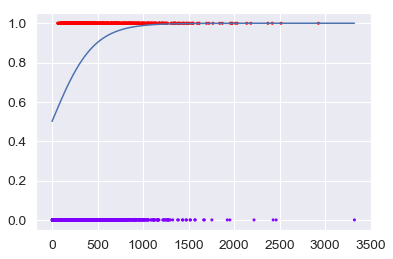

In [111]:
df2 = pd.DataFrame({'x': X_test[:,0], 'y': y_test})
df2 = df2.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df2['x'] * LogReg.coef_[0][0] + LogReg.intercept_[0]).ravel()
plt.plot(df2['x'], sigmoid_function)
plt.scatter(df2['x'], df2['y'], c=df2['y'], cmap='rainbow', s=4)#, edgecolors='b')
#plt.xlim(-1000,3500)
plt.show()

In [108]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Get dummy variables:

In [124]:
[(ds1, df1[ds1].nunique()) for ds1 in df1.columns if df1[ds1].dtype == 'O']

[('job', 12),
 ('marital', 4),
 ('education', 8),
 ('default', 3),
 ('housing', 3),
 ('loan', 3),
 ('contact', 2),
 ('month', 10),
 ('day_of_week', 5),
 ('poutcome', 3)]

In [149]:
job = pd.get_dummies(df1['job'], prefix = 'job', drop_first=True)
job.head(3)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [150]:
marital = pd.get_dummies(df1['marital'], prefix = 'mar', drop_first=True)
#marital.head(3)

In [151]:
education = pd.get_dummies(df1['education'],prefix = 'edu', drop_first=True)
#education.head(3)

In [152]:
default = pd.get_dummies(df1['default'], prefix = 'def', drop_first=True)
#default.head(3)

In [153]:
housing = pd.get_dummies(df1['housing'], prefix = 'hou', drop_first=True)
#housing.head(3)

In [154]:
loan = pd.get_dummies(df1['loan'], prefix = 'loa', drop_first=True)
#loan.head(3)

In [155]:
contact = pd.get_dummies(df1['contact'], prefix = 'con', drop_first=True)
#contact.head(3)

In [156]:
month = pd.get_dummies(df1['month'], prefix = 'mon', drop_first=True)
#month.head(3)

In [157]:
day_of_week = pd.get_dummies(df1['day_of_week'], prefix = 'day', drop_first=True)
#day_of_week.head(3)

In [158]:
poutcome = pd.get_dummies(df1['poutcome'], prefix = 'pou', drop_first=True)
#poutcome.head(3)

In [159]:
cols_drop = [col for col in df1.columns if df1[col].dtype == 'O']
df2 = df1.drop(cols_drop,axis=1)
df2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [160]:
df2 = pd.concat([df2,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
age                        41188 non-null int64
duration                   41188 non-null int64
campaign                   41188 non-null int64
pdays                      41188 non-null int64
previous                   41188 non-null int64
emp_var_rate               41188 non-null float64
cons_price_idx             41188 non-null float64
cons_conf_idx              41188 non-null float64
euribor3m                  41188 non-null float64
nr_employed                41188 non-null float64
y                          41188 non-null int64
job_blue-collar            41188 non-null uint8
job_entrepreneur           41188 non-null uint8
job_housemaid              41188 non-null uint8
job_management             41188 non-null uint8
job_retired                41188 non-null uint8
job_self-employed          41188 non-null uint8
job_services               41188 non-null uint8
job_student      

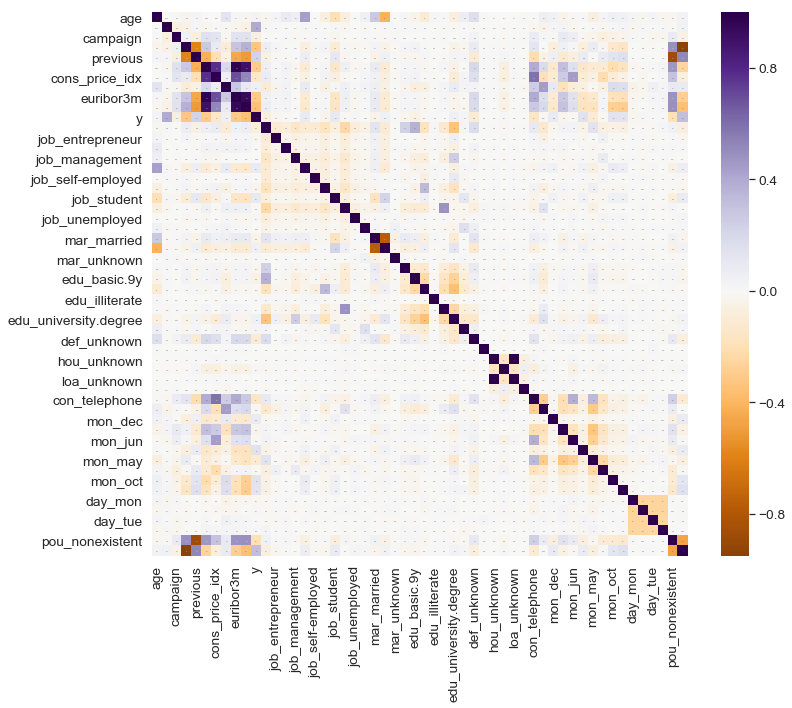

In [162]:
corr_mat2 = df2.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_mat2, cmap='PuOr', center=0.0, annot=True, annot_kws={'size': 1})
plt.show()

In [164]:
corr_mat2.loc['y', :].sort_values(ascending=False)

y                          1.000000
duration                   0.405274
pou_success                0.316269
previous                   0.230181
mon_mar                    0.144014
mon_oct                    0.137366
mon_sep                    0.126067
job_student                0.093955
job_retired                0.092221
mon_dec                    0.079303
cons_conf_idx              0.054878
mar_single                 0.054133
edu_university.degree      0.050364
age                        0.030399
edu_unknown                0.021430
job_unemployed             0.014752
day_thu                    0.013888
hou_yes                    0.011743
day_tue                    0.008046
edu_illiterate             0.007246
day_wed                    0.006302
mar_unknown                0.005211
edu_professional.course    0.001003
job_unknown               -0.000151
job_management            -0.000419
hou_unknown               -0.002270
loa_unknown               -0.002270
def_yes                   -0

In [179]:
cols2 = list(df2.columns)
cols2.remove('y')
#cols2

In [181]:
#cols2 = df2.columns[1:]
#cols2 = []
X2 = df2.loc[:, cols2].values
y2 = df1.loc[:, 'y'].values

In [182]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .2, random_state=0)

In [183]:
#LogReg = LogisticRegression(solver='lbfgs')   # otherwise solver set to 'lbfgs' (in the future)
LogReg2 = LogisticRegression()          # for one vs rest, standard 'liblinear
LogReg2.fit(X2_train, y2_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
y2_pred = LogReg2.predict(X2_test)

In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y2_test, y2_pred)
confusion_matrix2

array([[7127,  198],
       [ 522,  391]])

In [186]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7325
           1       0.66      0.43      0.52       913

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



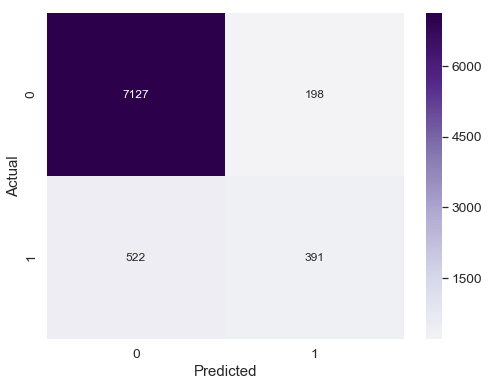

In [187]:
confusion_matrix2 = pd.crosstab(y2_test, y2_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
#sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 10}, fmt='% 4.2f')
sns.heatmap(confusion_matrix2, annot=True, annot_kws={'size': 12}, fmt='d', cmap='PuOr', center=0.0)
plt.show()